# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [7]:
employee=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\lab-pivot-table-and-correlation\your_code\data\Employee.csv")
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [8]:
# GroupBy Method
employee.groupby('Department').agg({'Salary':'mean'})



,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [9]:
# PivotTable Method
employee.pivot_table(index=['Department'], values=['Salary'], aggfunc=['mean'])


,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [10]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['mean'])


mean
                     Salary
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [26]:
employee.pivot_table(index=['Title'], values=['Years','Salary'], aggfunc={'Years':'count','Salary':'mean'})


,Salary,Years
Title,,
VP,70.000000,2
analyst,32.500000,4
associate,56.666667,3


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [17]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary', 'Name'], aggfunc={'Name':'count','Salary':'mean'})


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [19]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median', 'min', 'max', 'std'])


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [22]:
table=employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=['median', 'min', 'max', 'std'])
table=table.fillna(0)
table


median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [24]:
employee.pivot_table(index=['Department'], values=['Name','Salary'], aggfunc={'Name':'count','Salary':'sum'})


,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [25]:
employee.pivot_table(index=['Department', 'Title'], values=['Years','Salary'], aggfunc={'Years':'count','Salary':'sum'})

Salary  Years
Department Title                   
HR         VP             70      1
           analyst        65      2
IT         VP             70      1
           analyst        65      2
           associate      60      1
Sales      associate     110      2

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [67]:
import numpy as np

In [77]:
employee.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc={'Salary': lambda x: (np.sum(x) - np.max(x)) / np.size(x)})
# vp is 0 because it was the max value and if we remove it it will be 0/np.size(Salary) which returns 0

Salary
Department Title            
HR         VP            0.0
           analyst      15.0
IT         VP            0.0
           analyst      15.0
           associate     0.0
Sales      associate    27.5

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [28]:
fitbit=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\lab-pivot-table-and-correlation\your_code\data\Fitbit.csv")
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [30]:
#Explore Data Types
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [33]:
#Get an overview on main statistics for each column
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [37]:
# your answer here
corr_df=fitbit[["Minutes Very Active", "Steps"]]
corr_df.corr()

#0.57 indicates a positive correlation


,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

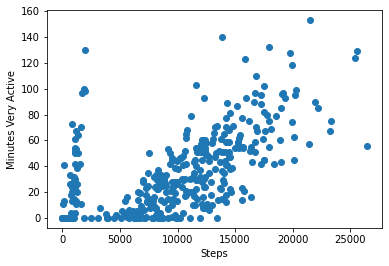

In [42]:
import numpy as np
import matplotlib.pyplot as plt


plt.scatter(fitbit['Steps'], fitbit['Minutes Very Active'])
plt.xlabel('Steps')
plt.ylabel('Minutes Very Active')
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
""" Both the correlation computation as well as the scatter plot show a positive correlation (=linear relationship)
therefore the more steps someone took the more minutes very active they have accumulated"""


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [43]:
corr_df2=fitbit[["Minutes Sedentary", "Steps"]]
corr_df2.corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

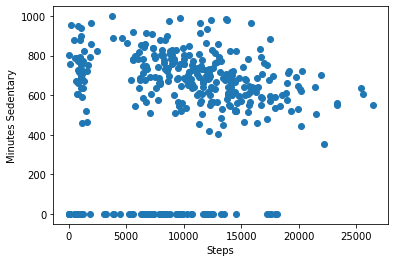

In [44]:

plt.scatter(fitbit['Steps'], fitbit['Minutes Sedentary'])
plt.xlabel('Steps')
plt.ylabel('Minutes Sedentary')
plt.show()

#we can't prove a linear relation between steps and minutes sedentary from the correlation or the scatterplot. We can see though that either people sit 
#almot nothing or sit a lot. In between 0 and 400 are no density of values. Biggest part of people sit a lot --> Could be due to desk jobs.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [45]:
corr_df3=fitbit[["MinutesOfSleep", "Steps"]]
corr_df3.corr()


,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

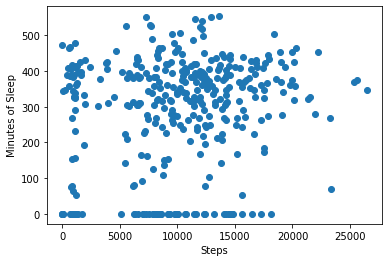

In [46]:
plt.scatter(fitbit['Steps'], fitbit['MinutesOfSleep'])
plt.xlabel('Steps')
plt.ylabel('Minutes of Sleep')
plt.show()

#no linear relation can be found between Steps and Minutes of sleep

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [51]:
cor_fit=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
cor_fit


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [53]:
cor_fit.sort_values('Steps', ascending=False)
#we can find the highest positive correlation between Step Count and Minutes Very Active. Median positive correlation we can find between floors and calories burnt
#no/very low correlation between Minutes of Sleep and Minutes Sedentary and Step Count.


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [57]:
time_grades=pd.read_csv(r"C:\Users\Alina Hartsch\OneDrive\Desktop\Ironhack\My_Lab_Solutions\Week 4\lab-pivot-table-and-correlation\your_code\data\Time_Grades.csv")
time_grades.head(3)


,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9


#### Show visually the frequency distribution of the time_grades dataset.

(array([[2., 2., 2., 2., 2., 2., 2., 1., 0., 0.],
        [0., 2., 2., 3., 2., 2., 2., 0., 0., 2.],
        [1., 3., 2., 4., 5., 0., 0., 0., 0., 0.]]),
 array([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0],
       dtype=object),
 <a list of 3 BarContainer objects>)

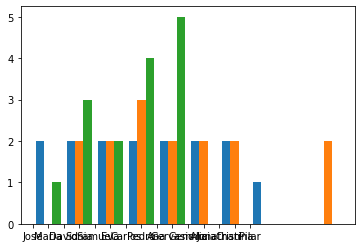

In [64]:
plt.hist(time_grades)


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [65]:
time_grades.corr(method='pearson') #yes there is a positive correlation


,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [66]:
time_grades.corr(method='spearman') #yes there is a positive correlation --> even stronger than with pearson correlation

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

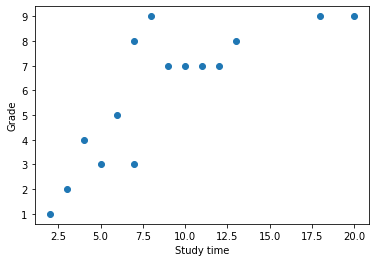

In [60]:
plt.scatter(time_grades['Study time'], time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

#there seems to be a linear relation between study time and grades --> positive correlated

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
"""Pearson Correlation Coefficient measures the lineare Realtion between two Variable 
(=A relationship is linear only when a change in one variable is associated with a proportional change in the other variable))
Spearman Correlation Coefficient is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables).
The Spearman correlation can evaluate a monotonic relationship between two variables — Continous or Ordinal and it is based on the ranked values for each variable.
Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables."""

